<a href="https://colab.research.google.com/github/Ryoojin/Data_Visualization/blob/main/Absenteeism_at_works_Group_2_Hyejin_Ryoo(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
import plotly.express as px
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, Normalize
from ipywidgets import interact
import ipywidgets as widgets

In [ ]:
uploaded = files.upload()

Saving Absenteeism_at_work_datacleaned.xlsx to Absenteeism_at_work_datacleaned.xlsx


In [ ]:
data = pd.read_excel('Absenteeism_at_work_datacleaned.xlsx')

In [ ]:
seasonal_day_data = data.groupby(['Seasons', 'Day of the week'])['Absenteeism time in hours'].sum().reset_index()

fig_sunburst = px.sunburst(seasonal_day_data, path=['Seasons', 'Day of the week'], values='Absenteeism time in hours',
                           title='Seasonal and Weekly Analysis of Absenteeism',
                           labels={'Absenteeism time in hours': 'Total Absenteeism Time (hours)'},
                           template='plotly')

fig_sunburst.show()

Saving Monday blue.jpeg to Monday blue (1).jpeg


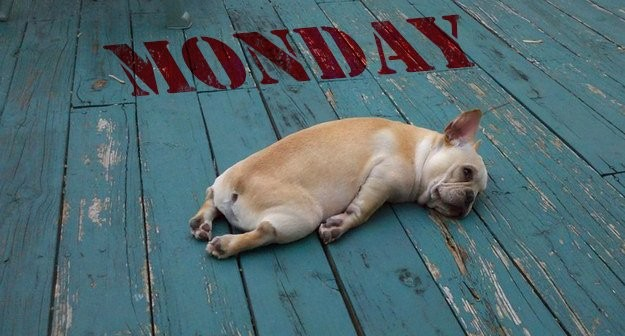

In [ ]:
from IPython.display import Image

uploaded = files.upload()
for filename in uploaded.keys():
    img = Image(filename=filename)
    display(img)

In [ ]:
def categorize_age(age):
    if age < 30:
        return '20s'
    elif age < 40:
        return '30s'
    elif age < 50:
        return '40s'
    else:
        return '50s and above'

data['Age Group'] = data['Age'].apply(categorize_age)

def get_bmi_color(bmi):
    if bmi < 18.5:
        return 0  # Underweight
    elif bmi < 25:
        return 1  # Normal weight
    else:
        return 2  # Overweight

cmap_blue = ListedColormap(['#add8e6', '#4682b4', '#000080'])
age_group_slider = widgets.SelectionSlider(
    options=['20s', '30s', '40s', '50s and above'],
    value='20s',
    description='Age Group',
    continuous_update=False
)

def highlight_age_group_with_custom_bmi_color_blue(age_group):
    fig, ax = plt.subplots(figsize=(10, 6))

    bmi_colors = data['Body mass index'].apply(get_bmi_color)
    scatter = ax.scatter(data['Age'], data['Absenteeism time in hours'],
                         s=data['Absenteeism time in hours']*10, alpha=0.1,
                         c=bmi_colors, cmap=cmap_blue, edgecolors='w')

    age_group_data = data[data['Age Group'] == age_group]
    age_group_bmi_colors = age_group_data['Body mass index'].apply(get_bmi_color)
    ax.scatter(age_group_data['Age'], age_group_data['Absenteeism time in hours'],
               s=age_group_data['Absenteeism time in hours']*10, alpha=0.7,
               c=age_group_bmi_colors, cmap=cmap_blue, edgecolors='w')

    norm = Normalize(vmin=0, vmax=2)
    sm = plt.cm.ScalarMappable(cmap=cmap_blue, norm=norm)
    sm.set_array([])
    cbar = plt.colorbar(sm, ticks=[0, 1, 2], label='Body Mass Index')
    cbar.set_ticklabels(['Underweight (<18.5)', 'Normal (18.5 - 25)', 'Overweight (>=25)'])

    ax.set_title('Scatter Plot of Absenteeism with Age Group Highlighted (Colored by BMI, Blue Shades)')
    ax.set_xlabel('Age')
    ax.set_ylabel('Absenteeism Time (hours)')
    ax.grid(True)
    plt.show()

interact(highlight_age_group_with_custom_bmi_color_blue, age_group=age_group_slider)

interactive(children=(SelectionSlider(continuous_update=False, description='Age Group', options=('20s', '30s',…

<function __main__.highlight_age_group_with_custom_bmi_color_blue(age_group)>